In [1]:
# 1. 데이터 준비 (와인 데이터)
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler # 정규화 - PCA는 정규화 필요
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = load_wine()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

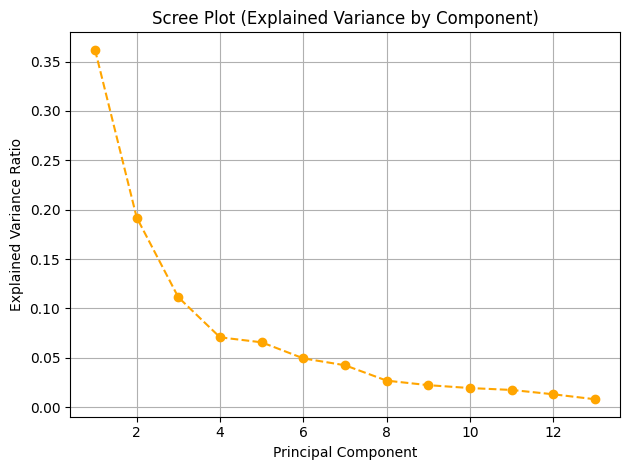

In [5]:
# 스크리 플랏
plt.plot(range(1, len(pca.explained_variance_ratio_)+1),   # X축
         pca.explained_variance_ratio_,                    # y축
         marker='o', linestyle='--', color='orange')

plt.title('Scree Plot (Explained Variance by Component)')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

In [6]:
cummulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = (cummulative_variance >= 0.95).argmax() + 1 # 누적 설명력이 95% 이상이 되는 첫번째 주성분 찾아!

In [7]:
pca_final = PCA(n_components=n_components)
X_pca_final = pca_final.fit_transform(X_scaled)

In [8]:
# K-means 모델링
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # 위에 급경사 -> 완경사 되는 구간
cluster_labels = kmeans.fit_predict(X_pca_final)

In [9]:
n_components, pd.Series(cluster_labels).value_counts().sort_index()

(np.int64(10),
 0    27
 1    49
 2    47
 3    55
 Name: count, dtype: int64)

# 추가 - 실루엣 스코어

In [10]:
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt

Text(0, 0.5, 'SSE')

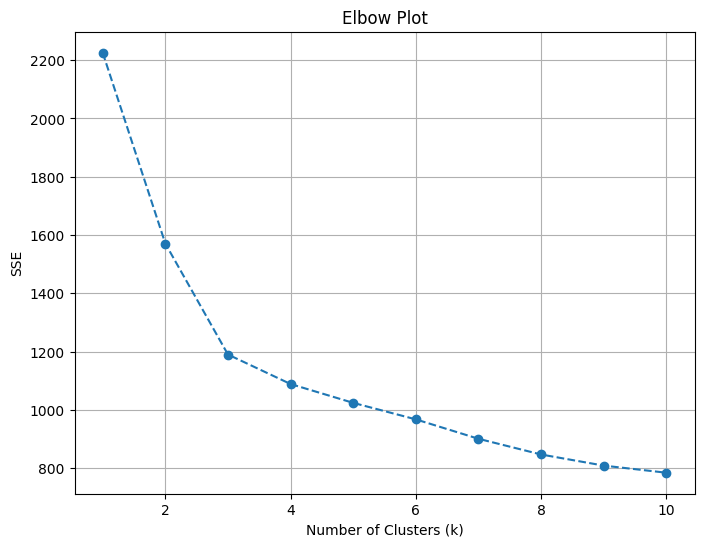

In [13]:
sse = []

k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca_final)
    sse.append(kmeans.inertia_)

# Elbow plot
plt.figure(figsize=(8, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.grid(True)
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')

In [18]:
# 실루엣 스코어 평가
sil_score = silhouette_score(X_pca_final, cluster_labels)
sil_score

# 실루엣 스코어: 0~1까지 점수이며, 응집도와 분리도 기준임
# 참조: sse는 거리제곱합
# 1에 가까울수록 좋은 점수

np.float64(0.2733191995781998)

# 추가 - 2차원으로 시각화

In [19]:
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
kmeans_2d = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_2d = kmeans_2d.fit_predict(X_pca_2d)

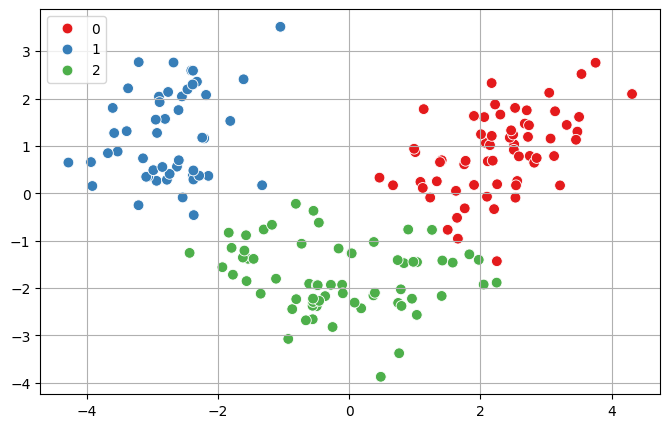

In [21]:
# 시각화
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca_2d[:, 0], y=X_pca_2d[:, 1], hue=labels_2d, palette='Set1', s=60)
plt.grid(True)
plt.show()